# Winning Jeopardy

Jeopardy is a popular TV show in the US where participants answer questions to win money. It's been running for many years, and is a major force in popular culture. Imagine that you want to compete on Jeopardy, and you're looking for any way to win. In this project, you'll work with a dataset of Jeopardy questions to figure out some patterns in the questions that could help you win.

## Libraries

In [1]:
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

## Functions

In [3]:
def normalize_value(string):
    '''
    Takes a string and converts it into integer removing punctuation symbols, if errors return 0.
    
    Args:
        string: Number to be converted.
        
    Return:
        int: Converted string.
    '''
    try:
        return int(re.sub('[^\w\s]','',string))
    except Exception:
        return 0    

In [4]:
def normalize_string(string):
    '''
    Converts a string to lower case and removes punctuation symbols.
    
    Args:
        string: String to be converted.
        
    Return:
        string: Converted string.
    '''
    string = string.lower()
    string = re.sub('[^A-Za-z0-9\s]', '', string)
    string = re.sub('\s+', ' ', string)    
    return string

In [5]:
def count_answer_question_matches(row):
    '''
    Gets row and counts the  matches in columns 'clean_answer' and 'clean_question'
    Args:
        series: dataframe row.
    Return:c
        int: match count.
    '''
    
    match_count = 0
    split_answer = row["clean_answer"].split()
    split_question = row["clean_question"].split()
        
    if 'the' in split_answer:
        split_answer.remove('the')
    if len(split_answer) == 0:
        return 0
    for word in split_answer:
        if word in split_question:
            match_count += 1
    return match_count / len(split_answer)

## Data Exploration

In [6]:
jeopardy = pd.read_csv("JEOPARDY_CSV.csv")
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [8]:
jeopardy.dtypes

Show Number     int64
 Air Date      object
 Round         object
 Category      object
 Value         object
 Question      object
 Answer        object
dtype: object

In [9]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

Removes spaces from columns names:

In [10]:
jeopardy.columns = map(str.strip, jeopardy.columns)
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [11]:
jeopardy.Answer = jeopardy.Answer.astype(str)

### Normalizing Columns

The columns **Value, Question and Answer** will be normalized to make easier to conduct data analysis:

In [12]:
jeopardy['clean_question'] = jeopardy['Question'].apply(normalize_string)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(normalize_string)
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


In [13]:
jeopardy['clean_value'] = jeopardy['Value'].apply(normalize_value)
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200


In [14]:
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200


### Study past questions, study general knowledge or not study at all

In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:
<ul>
    <li>How often the answer can be used for a question.</li>
    <li>How often questions are repeated.</li>
</ul>

In [15]:
jeopardy['answer_in_question'] = jeopardy.apply(count_answer_question_matches, axis=1)
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200,0.0
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200,0.0
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200,0.0
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200,0.0
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200,0.0


In [16]:
round(jeopardy['answer_in_question'].mean() * 100, 2)

5.79

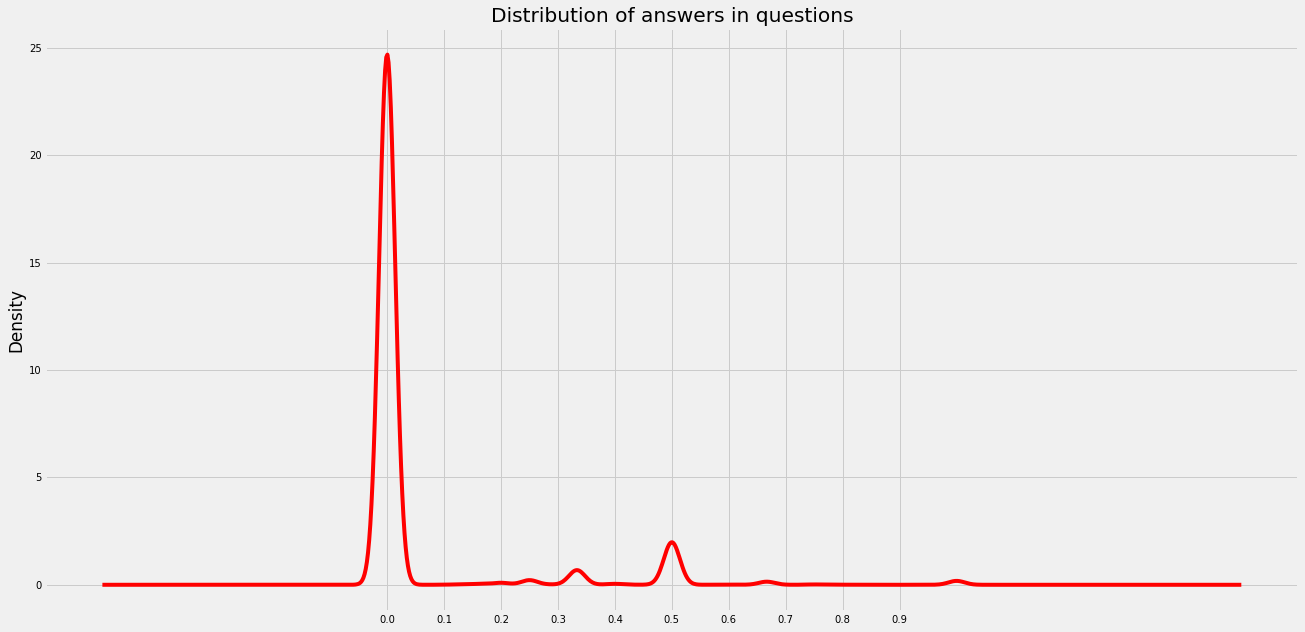

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
jeopardy['answer_in_question'].plot.kde(color='red', title='Distribution of answers in questions', fontsize=10)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

As we can see in the previous cells **How often the answer can be used for a question?**, only int **5.7%** of the cases, the question contains the answer. So, this approach is not reliable. We will reject it and proceed with the second one.

**How often new questions are repeated of older ones?** It can not completely be answered, the dataset includes only 10% of the full jeopardy question dataset but we can investigate it.

In [18]:
question_overlap = []
terms_used = set()
min_word_length = 6

jeopardy.sort_values('Air Date', inplace = True)
for i, row in jeopardy.iterrows():
    split_question = row['clean_question'].split()
    split_question = [q for q in split_question if len(q)>= min_word_length]
    match_count = 0
    for term in split_question:
        if term in terms_used:
            match_count += 1
        terms_used.add(term)
    if len(split_question) > 0:
        match_count = match_count / len(split_question)
    question_overlap.append(match_count)
    
jeopardy["question_overlap"] = question_overlap

In [19]:
round(jeopardy["question_overlap"].mean() * 100, 2)

87.27

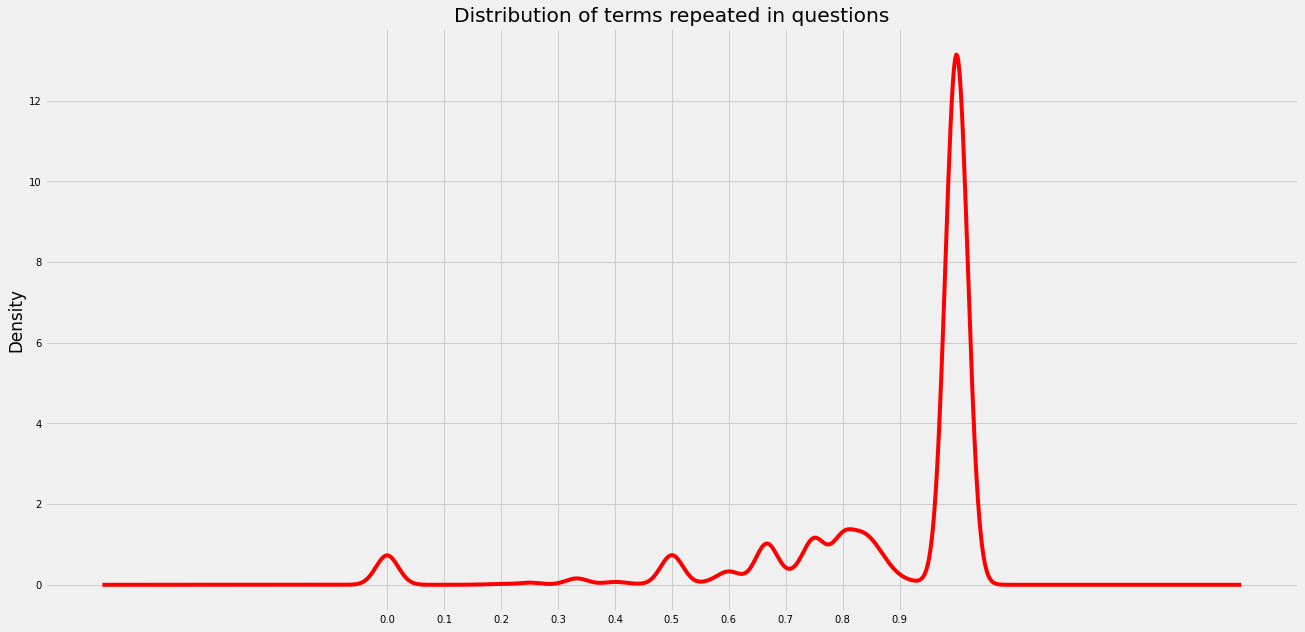

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
jeopardy['question_overlap'].plot.kde(color='red', title='Distribution of terms repeated in questions', fontsize=10)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

About **87.27%** of the complex words (more than 6 characters) are repeated so it seem studying the past questions can be a good option to increase the winning probabilities.

### Low and High value questions

Let's say that a form which will help us to earn more money when we are on  Jeopardy is studing questions that pertain to high value questions (value greater than 800).

To determine which terms correspond to high-value questions will be implemente a chisquared test.

In [21]:
jeopardy['value'] = np.where(jeopardy['clean_value'] >= 800, 1, 0)
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value,answer_in_question,question_overlap,value
84523,1,1984-09-10,Jeopardy!,LAKES & RIVERS,$100,River mentioned most often in the Bible,the Jordan,river mentioned most often in the bible,the jordan,100,0.000000,0.0,0
84565,1,1984-09-10,Double Jeopardy!,THE BIBLE,$1000,"According to 1st Timothy, it is the ""root of a...",the love of money,according to 1st timothy it is the root of all...,the love of money,1000,0.333333,0.0,1
84566,1,1984-09-10,Double Jeopardy!,'50'S TV,$1000,Name under which experimenter Don Herbert taug...,Mr. Wizard,name under which experimenter don herbert taug...,mr wizard,1000,0.000000,0.0,1
84567,1,1984-09-10,Double Jeopardy!,NATIONAL LANDMARKS,$1000,D.C. building shaken by November '83 bomb blast,the Capitol,dc building shaken by november 83 bomb blast,the capitol,1000,0.000000,0.0,1
84568,1,1984-09-10,Double Jeopardy!,NOTORIOUS,$1000,"After the deed, he leaped to the stage shoutin...",John Wilkes Booth,after the deed he leaped to the stage shouting...,john wilkes booth,1000,0.000000,0.0,1


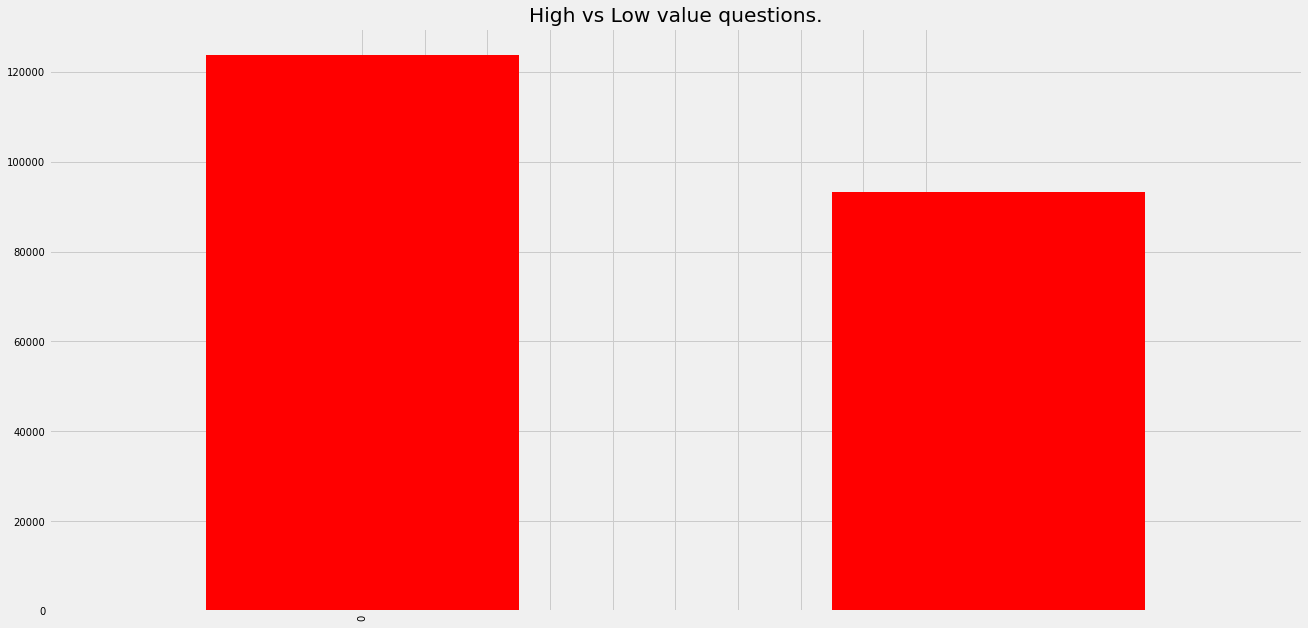

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
jeopardy['value'].value_counts().plot.bar(color='red', title='High vs Low value questions.', fontsize=10)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

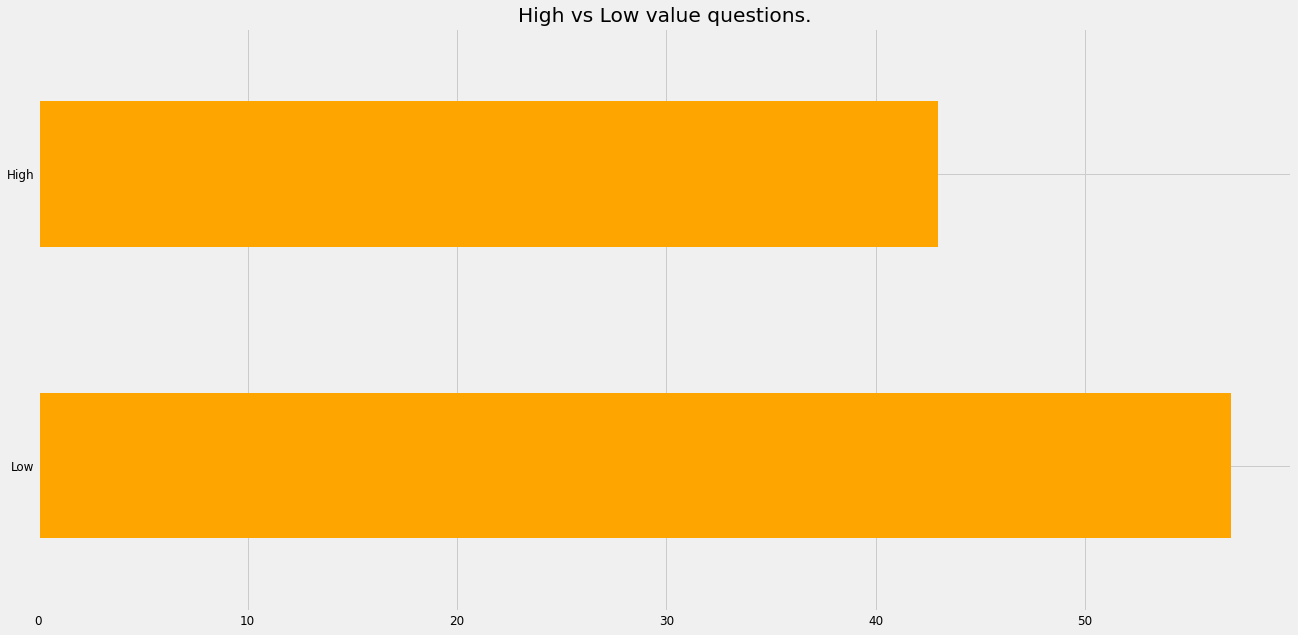

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20, 10))
round(jeopardy['value'].value_counts(normalize=True) * 100, 2).plot(kind='barh',
                                                                    color='orange', 
                                                                    title='High vs Low value questions.', 
                                                                    fontsize=10)
plt.yticks([1, 0], ["High", "Low"], fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [24]:
def count_word(word):
    low_count = 0
    high_count = 0
    for index, row in jeopardy.iterrows():
        if word in row['clean_question'].split(' '):
            if row['value'] == 1:
                high_count += 1
            else: 
                low_count += 1
    return high_count, low_count

In [25]:
terms_used_list = list(terms_used)
observed_expected = []

comparison_terms = random.sample(terms_used_list, 10)
print(comparison_terms)
    
for word in comparison_terms:
    observed_expected.append(count_word(word))
print(observed_expected)    

['horaces', 'goldcolored', 'synchilla', 'maples', 'vandalize', 'gatefold', 'hrefhttpwwwjarchivecommedia20050602j08ajpg', 'kavalier', 'schnitzel', 'treater']
[(0, 3), (1, 3), (1, 0), (1, 5), (0, 1), (1, 0), (1, 0), (1, 1), (1, 2), (0, 1)]


### Chi-squared test

In [26]:
high_values_count = jeopardy[jeopardy["value"] == 1].shape[0]
low_values_count = jeopardy[jeopardy["value"] == 0].shape[0]

In [27]:
chi_squared = []
for item in observed_expected:
    total = item[0] + item[1]
    total_prop = total / len(jeopardy)
    
    expected_high = total_prop * high_values_count
    expected_low = total_prop * low_values_count
    
    observed = np.array([item[0], item[1]])
    expected = np.array([expected_high, expected_low])
    
    chi_squared.append(chisquare(observed, expected))

In [28]:
chi_squared[:5]

[Power_divergenceResult(statistic=2.263247282608696, pvalue=0.1324760162182189),
 Power_divergenceResult(statistic=0.5288177221996553, pvalue=0.4671043381048845),
 Power_divergenceResult(statistic=1.325529040972535, pvalue=0.24960216618620146),
 Power_divergenceResult(statistic=1.697653843785278, pvalue=0.19259508920967341),
 Power_divergenceResult(statistic=0.7544157608695651, pvalue=0.38508176583769604)]